# L06.2 Support Vector Machine 
In the following we will explain the SVM classification by using the sklearn implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm

### L06.2.0 Warm up

Let us construct a simple data set to work with.

In [2]:
X = np.array([[1,2], [5,8], [1.5,1.8], [8,8], [1,0.6], [9,11]])  # Feature list (2d)
y = [0,1,0,1,0,1]  # Class affiliation (1d)

Text(0, 0.5, 'Y')

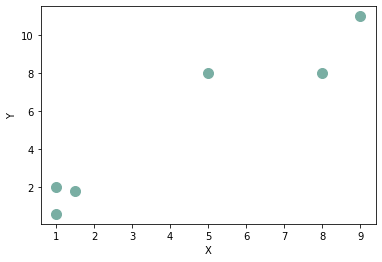

In [3]:
# Display the data
plt.scatter(X[:,0],X[:,1], c='#79AEA3', s=100)
plt.xlabel('X')
plt.ylabel('Y')

#### Create object on the SVM class

In [4]:
classifier = svm.SVC(kernel='linear')  # With that call we instantiate the SVM as linear 

#### Train the model

In [5]:
classifier.fit(X,y)  # In sklearn, fit is the method to train any model.

SVC(kernel='linear')

#### Use the trained model for prediction

In [6]:
point_to_predict = [3,3]  # Point to predict

# Predict the class of the given point. Ensure to hand over a 2d-array
print(classifier.predict([point_to_predict]))

[0]


#### Visualization

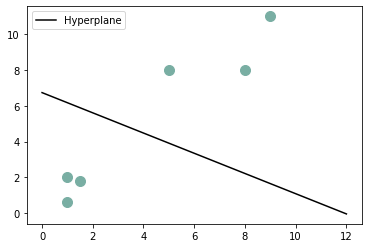

In [7]:
w = classifier.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - classifier.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="Hyperplane")
plt.scatter(X[:, 0], X[:, 1], c='#79AEA3', s=100)
plt.legend()
plt.show()

## Iris example
We want to use the common iris data set for this example. We restrict our data set - as in the last examples - to the first two features: 
- Sepal length
- Sepal width 

In [8]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=123)

Text(0, 0.5, 'Sepal width')

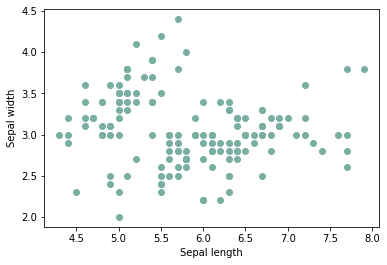

In [9]:
# Display the data set
plt.scatter(X[:,0], X[:,1], c='#79AEA3')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [10]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out, Z

### L06.2.1 Linear SVM

In [11]:
# Create object on the SVM class
model = svm.SVC(kernel="linear", C=1.0)

In [12]:
# Learn the SVM based on the input data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

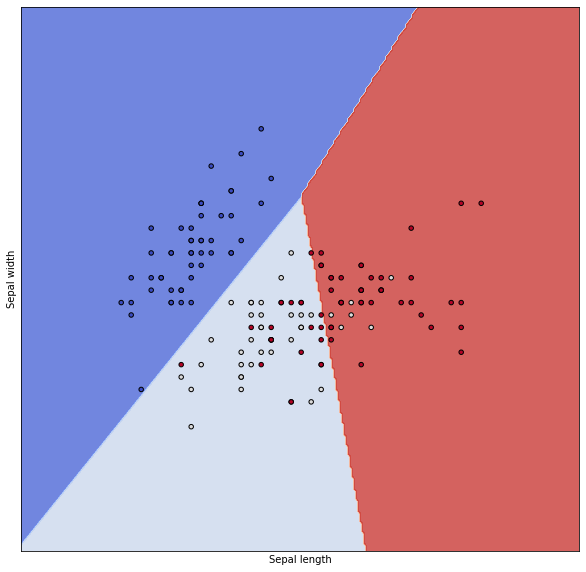

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

n, Z = plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [15]:
model.score(X_test, y_test)

0.8666666666666667

### L06.2.2 RBF kernel

In [16]:
# Create object on the SVM class
model = svm.SVC(kernel="rbf", gamma=0.7, C=1.0)

In [17]:
# Learn the SVM based on the input data
model.fit(X_train, y_train)

SVC(gamma=0.7)

In [18]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

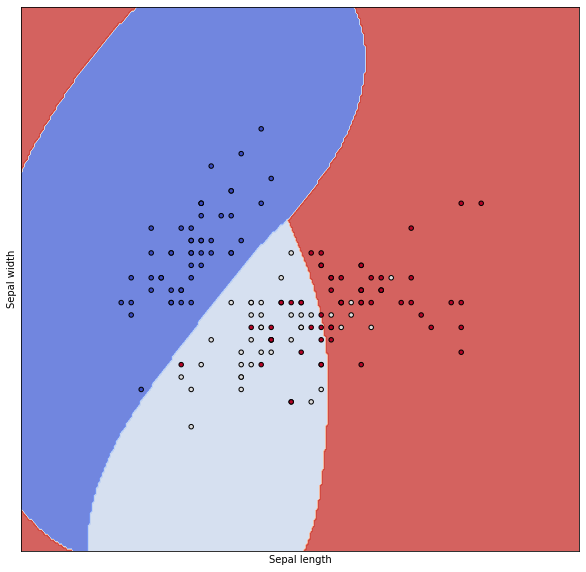

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

n, Z = plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [20]:
model.score(X_test, y_test)

0.8666666666666667

### L06.2.3. Polynomial kernel

In [21]:
# Create object on the SVM class
model = svm.SVC(kernel="poly", degree=3, gamma="auto")

In [22]:
# Learn the SVM based on the input data
model.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

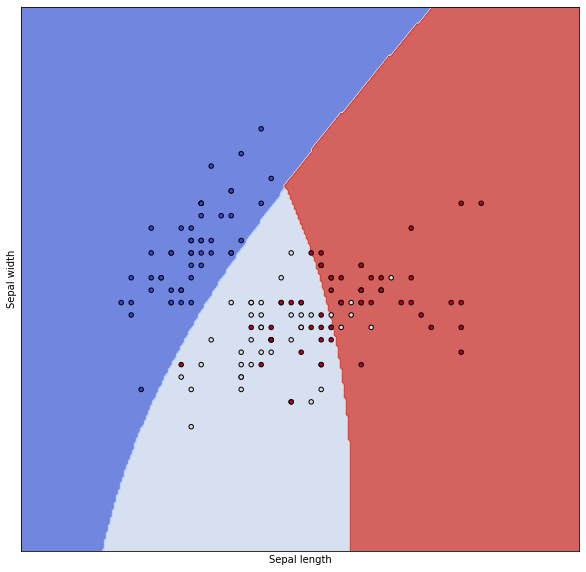

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

n, Z = plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [24]:
model.score(X_test, y_test)

0.8333333333333334